- Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

- Importing the dataset

In [26]:
df=pd.read_csv(r'C:\Users\Dell\Documents\worldhappiness.csv')

In [27]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [28]:
df.shape

(158, 12)

In [29]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Data Dictionary:
Country: Name of the country.

Region : Region the country belongs to

Happiness Rank: A rank given to the country to describe its happiness level i.e., based on happiness score.

Happiness Score: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness Score.

Family(Social Support): The extent to which Family contributes to the calculation of the Happiness Score

Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score

Freedom : Represent the satisfaction level of the population's freedom to choose what to do with their life

Trust (Government Corruption): The measure of how people think about how corruption in the country is, or the level of trust in government.

Generosity : Quality of being nice and generous contributes to the calculation of the Happiness Score.

In [30]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Here the target variable is 'Happiness score'. Here, it is a continuous variable and hence it is a regression problem statement.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [32]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Describe functions describes data only for the continuous columns but not for the categorical columns.


In [33]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We find that there is no null data present in the dataset. 

In [38]:
dfmean=df.loc[:,df.columns.drop(['Happiness Rank','Happiness Score','Dystopia Residual'])].mean()

In [39]:
dfmean

Standard Error                   0.047885
Economy (GDP per Capita)         0.846137
Family                           0.991046
Health (Life Expectancy)         0.630259
Freedom                          0.428615
Trust (Government Corruption)    0.143422
Generosity                       0.237296
dtype: float64

###### Making Dataframe for the nominal data

In [16]:
df_visualization_nominal=df[['Country','Region']].copy()

###### Making Dataframe for the  continuous data

In [18]:
df_visualization_continuous=df[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].copy()

###### Visualization of the Data

- Plotting distribution plot to visualize the data

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

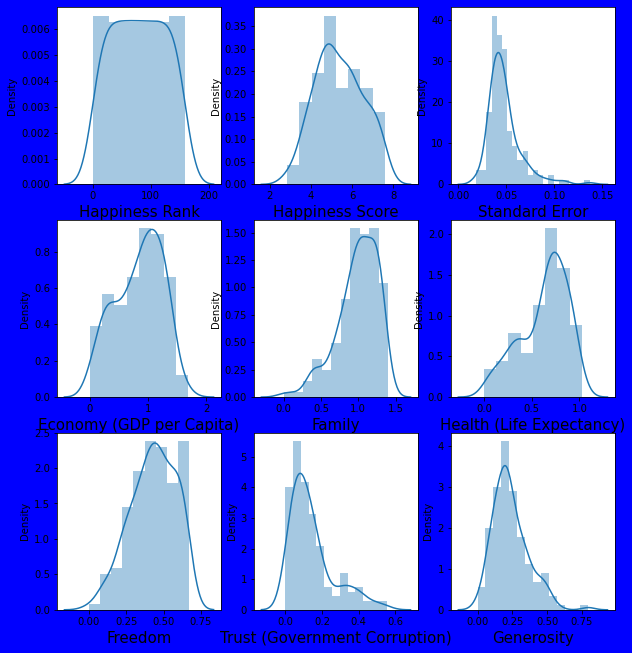

In [22]:
plt.figure(figsize=(10,15),facecolor='blue')
plotnum=1
for column in df_visualization_continuous:
    if plotnum<=9:
        ax=plt.subplot(4,3,plotnum)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize=15)
    plotnum+=1
plt.show()

For the columns like 'Family','Health' the data is left-skewed. 
For the columns 'Trust','generosity' the data is bit right-skewed.fi

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

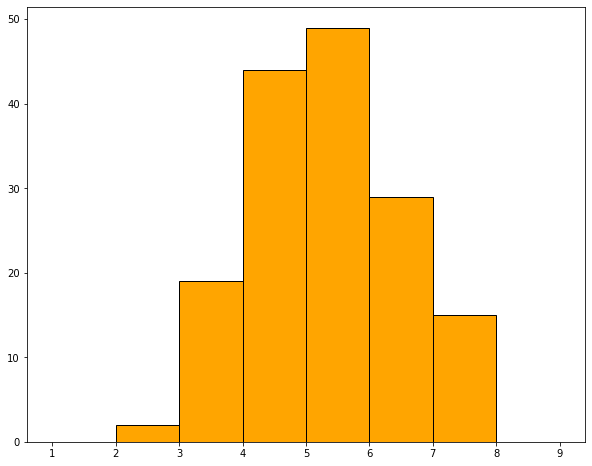

In [24]:
fig,ax=plt.subplots(figsize=(10,8))
hist=plt.hist(df['Happiness Score'],color='orange',edgecolor='black',bins=[1,2,3,4,5,6,7,8,9])
for hist in ax.containers:
    ax.bar_label(hist,padding=2)
plt.title('Happiness score vs frequency')
plt.xlabel('Happiness score')
plt.ylabel('frequency')

From the above graph, we observe approximately 48 countries have happiness score between 5 and 6 which is the most. 43 countries have happiness score between 4 and 5 which is the second most. From the histogram, it can be concluded that the major of the countries have happiness score between 4 and 7.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

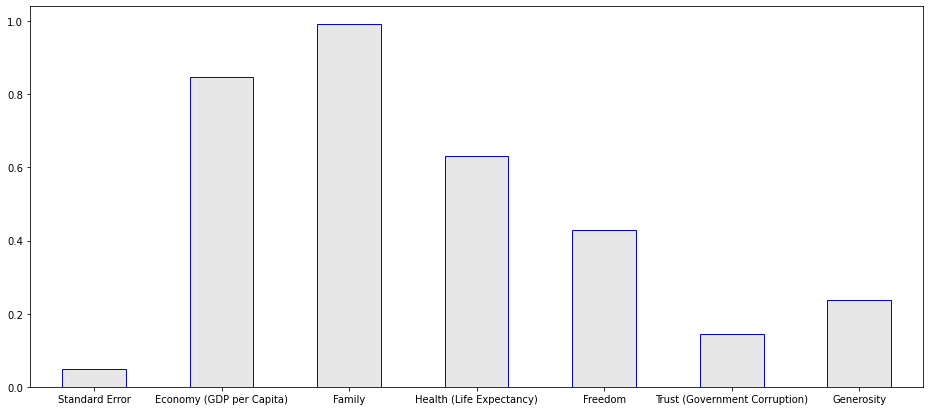

In [69]:
fig,ax=plt.subplots(figsize=(16,7))
x=dfmean.iloc[0]
y=dfmean.iloc[1]
bars=dfmean.plot.bar(x,y,color=(0.1,0.1,0.1,0.1),edgecolor='blue')
plt.xticks(rotation=0)
for bars in ax.containers:
    ax.bar_label(bars,padding=2)
plt.ylabel('Contribution to happiness')
plt.title("Contribution to happiness w.r.t parameter")
plt.show()

Hence family has more contribution to the happiness of people implementing that people from family need to support each other and are responsible to keep them happy.

Text(0.5, 1.0, 'Correlation between parameters')

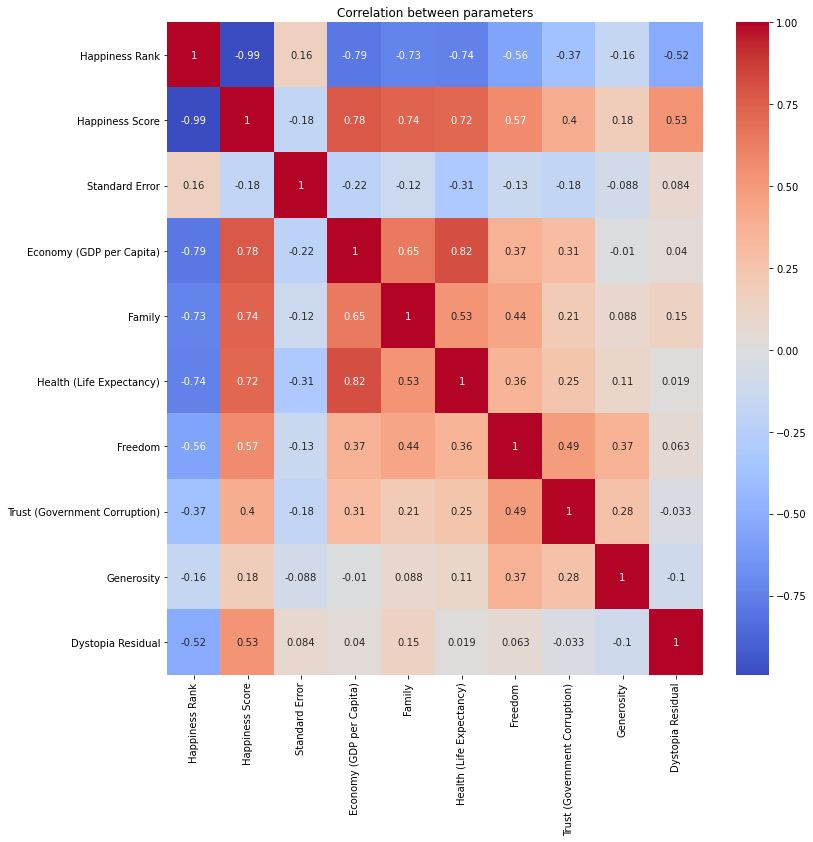

In [43]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.2g',cmap='coolwarm')
plt.title('Correlation between parameters')

We see that GDP per capita and Health life expectancy are highly correlated to each other i.e.,0.82
Also Family and GDP per capita is also correlated i.e.,0.65
This means that country with better GDP contributes to Healthy life and social support that eventually contributes to the country's happiness. 
Hence better is the GDP better will be the overall happiness score.

In [45]:
df.sort_values(by='Trust (Government Corruption)',ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
...,...,...,...,...,...,...,...,...,...,...,...,...
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
133,Bulgaria,Central and Eastern Europe,134,4.218,0.04828,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921,0.89991
85,Romania,Central and Eastern Europe,86,5.124,0.06607,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,1.93129
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367


The countries with highest impact of government corruption on happiness score are ranked much better as compared to other countries.
It concludes that the lesser the government corruption, happier is the country.
Hence we should focus to eliminate the corruption to make the country happier.

In [46]:
df_country=df.groupby('Country').sum()
df_country.sort_values(by='Happiness Score',ascending=False)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,
Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [47]:
df_country.sort_values(by='Happiness Score',ascending=False).head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,
Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


plt.subplots(figsize=(30,10))
cr=df_country['Happiness Score'].sort_values(ascending=False)
ax=cr.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Happiness Score')
ax.set_title('Country Rank Wise Happiness Score')
plt.show()
print(cr)

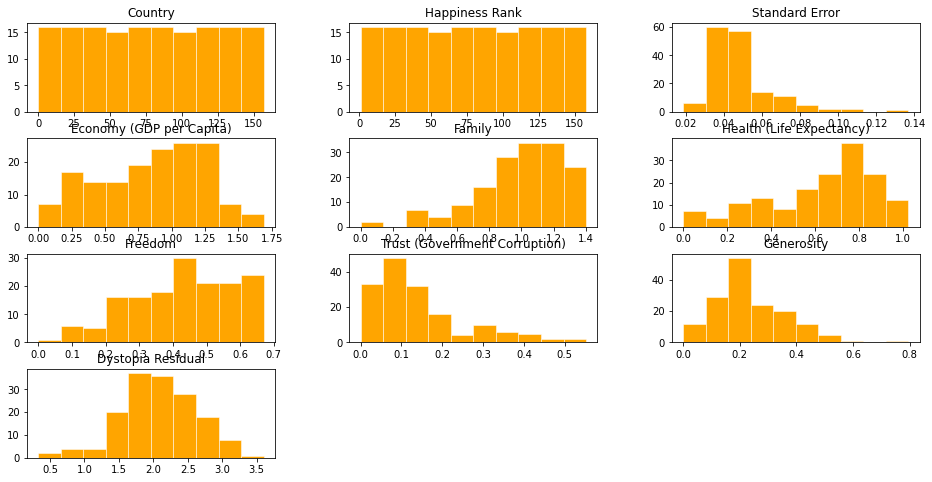

In [68]:
df.drop(["Happiness Score"],axis=1).hist(edgecolor='white',linewidth=0.5,figsize=(16,8),grid=False,color='orange')
plt.show()

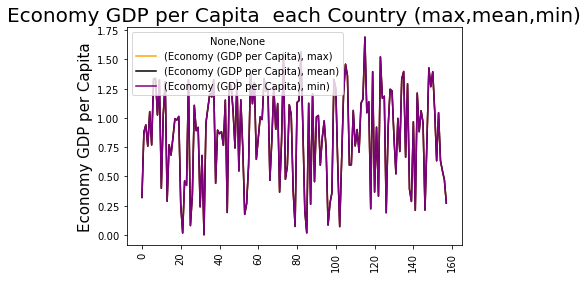

In [72]:
df[["Country","Economy (GDP per Capita)",]].groupby(["Country"]).agg(["max",'mean',"min"]).plot(kind="line",color =["orange","black","purple"])
plt.title("Economy GDP per Capita  each Country (max,mean,min)", fontsize=20)
plt.ylabel("Economy GDP per Capita",fontsize=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
df.Country=le.fit_transform(df.Country)

In [74]:
df.Region=le.fit_transform(df.Region)

In [75]:
x=df.drop(['Happiness Rank'],axis=1)
y=df['Happiness Rank']

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [80]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred=model.predict(X_test)

In [82]:
print('Training Accuracy:',model.score(X_train,y_train))
print('Testing Accuracy:',model.score(X_test,y_test))

Training Accuracy: 0.9883677298492739
Testing Accuracy: 0.980088814426173


Hence testing accuracy is 98%. We conclude that this model best fits.